# Projet Machine Learning en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> avec <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 100px; display: inline" alt="Scikit-learn"/></a>

# Introduction

Les données sont issues du site du concours KAGGLE; il s’agit du jeu de données " Gym Members Exercise
Dataset" disponible ici : https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset.
Ce jeu de données fournit un aperçu détaillé des routines d’exercice, des attributs physiques et des mesures
de la condition physique des membres d’une salle de sport. Il contient 15 variables observées chez 973 individus
fréquentant une salle de sport :
- Age : âge du membre de la salle de sport.
- Gender : Sexe du membre de la salle de sport (qualitative à deux modalités : homme ou femme).
- Weight..kg. : Poids du membre en kilogrammes.
- Height..m. : Taille du membre en mètres.
- Max_BPM : Fréquence cardiaque maximale (battements par minute) pendant les séances d’entraînement.
- Avg_BPM : Fréquence cardiaque moyenne pendant les séances d’entraînement.
- Resting_BPM : Fréquence cardiaque au repos avant l’entraînement.
- Session_Duration..hours. : Durée de chaque séance d’entraînement en heures.
- Calories_Burned : Total des calories brûlées au cours de chaque séance.
- Workout_Type : Type d’entraînement effectué (qualitative à 4 modalités : cardio, musculation, yoga,
HIIT).
- Fat_Percentage (Pourcentage de graisse) : Pourcentage de graisse corporelle du membre.
- Water_Intake..liters. : Consommation quotidienne d’eau pendant les séances d’entraînement.
- Workout_Frequency..days.week. : Nombre de séances d’entraînement par semaine (qualitative à 4
modalités : 2 à 5).
- Experience_Level : Niveau d’expérience (qualitative à 3 modalités : 1 pour débutant à 3 pour expert).
- BMI : Indice de masse corporelle (IMC), calculé à partir de la taille et du poids.

  
Dans ce projet, on souhaite dans un premier temps, prédire la variable **Calories_Burned** à partir de toutes
les autres variables, et dans un second temps, prédire la variable **Experience_Level** à partir de toutes les autres
variables (dont Calories_Burned).

Pour cela nous allons commencer par une exploration des variables quantitatives et qualitatives. Ensuite nous passerons à la modélisation des variables à prédire.


In [1]:
# Chargement des librairies nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


<h1 style="color:red">I)  Exploration des variables</h1>


### 1) Prise en charge des données : Vérification de la nature des différentes variables et leur encodage. Convertion des variables qualitatives.

In [2]:
# Lecture des données
path = ""
gym = pd.read_csv("gym_members_exercise_tracking.csv")

# Affichage des premières lignes
print("Aperçu des premières lignes du jeu de données:")
display(gym.head())  

# Résumé statistique
print("\nRésumé statistique du jeu de données:")
display(gym.describe(include='all'))  

Aperçu des premières lignes du jeu de données:


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39



Résumé statistique du jeu de données:


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973,973.000000,973.000000,973.000000,973.000000,973.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strength,NaN,NaN,NaN,NaN,NaN
freq,NaN,511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258,NaN,NaN,NaN,NaN,NaN
mean,38.683453,NaN,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,NaN,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,NaN,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,NaN,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,NaN,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,NaN,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,NaN,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,NaN,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,NaN,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,NaN,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,NaN,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,NaN,29.300000,3.100000,4.000000,2.000000,28.560000


On remarque que il y a plusieurs variables qualitatives : Gender, Workout_Type.
De même certaines variables ne prennent pas beaucoup de valeurs différentes donc il est intérréssant de les convertir en facteur : Experience_Level, Workout_Frequency..days.week.

Les autres variables sont des variables quantitatives que l'on transformera plus tard. 

In [3]:
print(gym.columns.tolist())

['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']


In [4]:
# Nettoyage des noms de colonnes : suppression des unités entre parenthèses et espaces
gym.columns = (
    gym.columns
    .str.replace(r"\s*\(.*?\)", "", regex=True)  # Supprime tout ce qui est entre parenthèses
    .str.replace(" ", "_")                      # Remplace les espaces par des underscores
)


In [5]:
print(gym.columns.tolist())

['Age', 'Gender', 'Weight', 'Height', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_Intake', 'Workout_Frequency', 'Experience_Level', 'BMI']


In [6]:
# Conversion des colonnes en types catégoriels
categorical_columns = [
    "Gender",
    "Workout_Type",
    "Experience_Level",
    "Workout_Frequency"
]

for col in categorical_columns:
    gym[col] = gym[col].astype("category")


### 2) Exploration par une analyse descriptive unidimensionnelle des données.

Conformément aux analyses faites sur le fichier R, nous transformons les variables Weight et BMI.

In [7]:
# Application du logarithme sur les colonnes 'Weight..kg.' et 'BMI'
gym["LWeight"] = np.log(gym["Weight"])
gym["LBMI"] = np.log(gym["BMI"])

# Supprimer les colonnes originales
gym.drop(columns=["Weight", "BMI"], inplace=True)

In [8]:
print("\nRésumé statistique du jeu de données:")
display(gym.describe(include='all'))  


Résumé statistique du jeu de données:


,Age,Gender,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Workout_Frequency,Experience_Level,LWeight,LBMI
count,973.000000,973,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973,973.000000,973.000000,973.0,973.0,973.000000,973.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,4.0,3.0,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,Strength,NaN,NaN,3.0,2.0,NaN,NaN
freq,NaN,511,NaN,NaN,NaN,NaN,NaN,NaN,258,NaN,NaN,368.0,406.0,NaN,NaN
mean,38.683453,NaN,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,NaN,24.976773,2.626619,NaN,NaN,4.262981,3.180764
std,12.180928,NaN,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,NaN,6.259419,0.600172,NaN,NaN,0.277751,0.263097
min,18.000000,NaN,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,NaN,10.000000,1.500000,NaN,NaN,3.688879,2.511224
25%,28.000000,NaN,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,NaN,21.300000,2.200000,NaN,NaN,4.062166,3.001217
50%,40.000000,NaN,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,NaN,26.200000,2.600000,NaN,NaN,4.248495,3.184698
75%,49.000000,NaN,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,NaN,29.300000,3.100000,NaN,NaN,4.454347,3.352007


<h1 style="color:red">II- Prédiction des Calories Brulées</h1>


Nous considérons maintenant le problème de la prédiction la variable Calories_Burned à partir des autres
variables du point de vue de l’apprentissage automatique, c’est-à-dire en nous concentrant sur les performances
du modèle. L’objectif est de déterminer les meilleures performances que nous pouvons attendre, et les modèles
qui les atteignent. 

## 2.1 Division du jeu de données en un échantillon d'apprentissage et un échantillon test
Nous divisons le jeu de données en un échantillon d’apprentissage et un échantillon test. Nous prenons un 
pourcentage de 20% pour l’échantillon test. 


In [9]:
#Variables qualitatives
qual_vars = gym.select_dtypes(include="category").columns.tolist()
gymDum = pd.get_dummies(gym[qual_vars], drop_first=True)
print(qual_vars)


['Gender', 'Workout_Type', 'Workout_Frequency', 'Experience_Level']


In [10]:
gymQuant=gym[['Age', 'Height', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration',  'Fat_Percentage', 'Water_Intake',  'LWeight', 'LBMI']]
dfC=pd.concat([gymDum,gymQuant],axis=1)
dfC.head()

# variable à expliquer réelle
Yr=gym["Calories_Burned"]

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Yr_train, Yr_test = train_test_split(dfC, Yr, test_size=0.2, random_state=235)

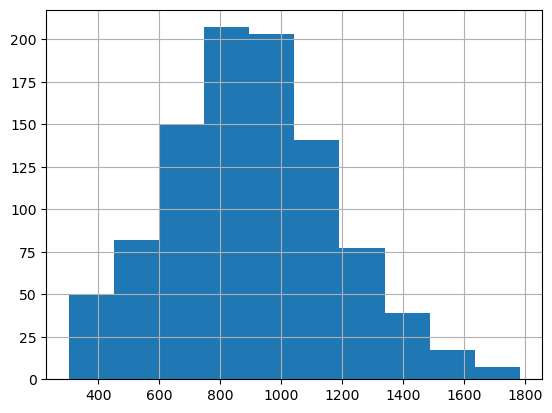

In [12]:
Yr.hist()
plt.show()

#### Normalisation des données

In [13]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)
Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(X_test)

##  2.2 Modèle linéaire (généralisé) avec/sans sélection de variables, avec/sans pénalisation


### 2.2.1 Modèle linéaire sans selection de variables 

### 2.2.2 Sélection de variable par régularisation L1 (LASSO)

In [14]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
regLasso = linear_model.Lasso()
regLasso.fit(Xr_train,Yr_train)
prev_lasso=regLasso.predict(Xr_test)
print("MSE=",mean_squared_error(Yr_test,prev_lasso))

MSE= 1438.8323559129444


In [15]:
from sklearn.metrics import r2_score

Le paramètre de pénalisation Lasso est optimisé par validation croisée ci dessous.

In [16]:
from sklearn.model_selection import GridSearchCV

# grille de valeurs du paramètre alpha à optimiser
param=[{"alpha":[0.5,0.8,1,3,4.52]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=10,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, Yr_train)


# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.977778, Meilleur paramètre = {'alpha': 0.8}


In [17]:
# Coefficients gardés par Lasso
regLasso=linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso=regLasso.fit(Xr_train,Yr_train)
model_lasso.coef_
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 11 variables et en supprime 8


##### Prévision sur l'échantillon de test

In [18]:
# Résultats de prédiction sur l'échantillon de test
prev_lasso=regLassOpt.predict(Xr_test)
mse_mod_lin_lasso=mean_squared_error(prev_lasso,Yr_test)
r2_mod_lin_lasso=r2_score(Yr_test,prev_lasso)
print("MSE=", mse_mod_lin_lasso)
print("Q2=",r2_mod_lin_lasso)

MSE= 1444.709428437312
Q2= 0.9811030766010623


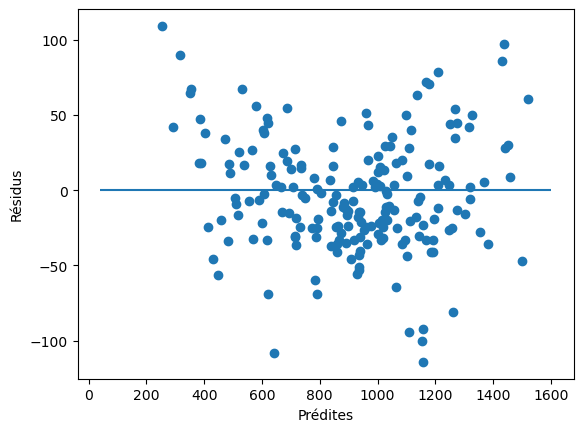

In [19]:
# Résidus sur l'échantillon de test
plt.plot(prev_lasso,Yr_test-prev_lasso,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,40,1600)
plt.show()

Text(0.5, 1.0, 'Coefficients du modèle lasso')

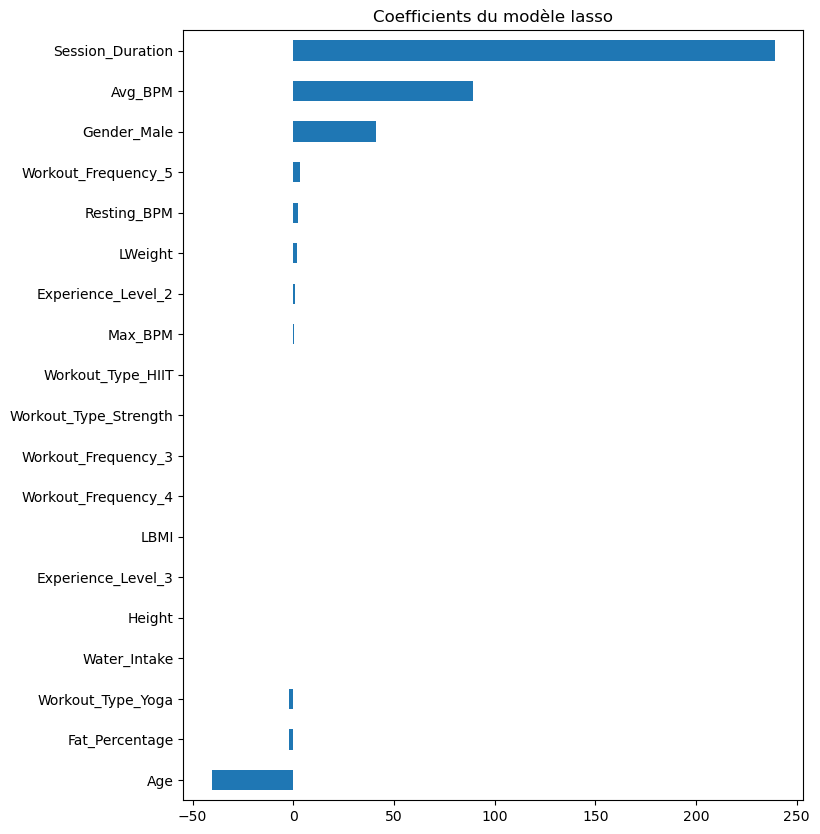

In [20]:
#Importance des paramètres
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients du modèle lasso")

Le lambda optimal (alpha) trouvé par Python correspond au lambda min trouvé en R. Toutefois, avec un même paramètre de régularisation, le code python de la prédiction de modèle linéaire a de meilleurs résultats que R.

### 2.2.3 Sélection de variable par régularisation L2 (Ridge)

In [21]:
regRidge = linear_model.Ridge()
regRidge.fit(Xr_train,Yr_train)
prev_ridge=regRidge.predict(Xr_test)
print("MSE=",mean_squared_error(Yr_test,prev_ridge))

MSE= 1489.272242891407


In [22]:
# grille de valeurs du paramètre alpha à optimiser
param=[{"alpha":[0.5,0.8,1,3,4.52]}]
regRidge = GridSearchCV(linear_model.Ridge(), param,cv=10,n_jobs=-1)
regRidgeOpt=regRidge.fit(Xr_train, Yr_train)

# paramètre optimal
regRidgeOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regRidgeOpt.best_score_,regRidgeOpt.best_params_))

Meilleur R2 = 0.977560, Meilleur paramètre = {'alpha': 0.8}


In [23]:
# Résultats de prédiction sur l'échantillon de test
prev_ridge=regRidgeOpt.predict(Xr_test)
mse_mod_lin_ridge=mean_squared_error(prev_ridge,Yr_test)
r2_mod_lin_ridge=r2_score(Yr_test,prev_ridge)
print("MSE=", mse_mod_lin_ridge)
print("Q2=",r2_mod_lin_ridge)

MSE= 1488.8294949154576
Q2= 0.9805259823423951


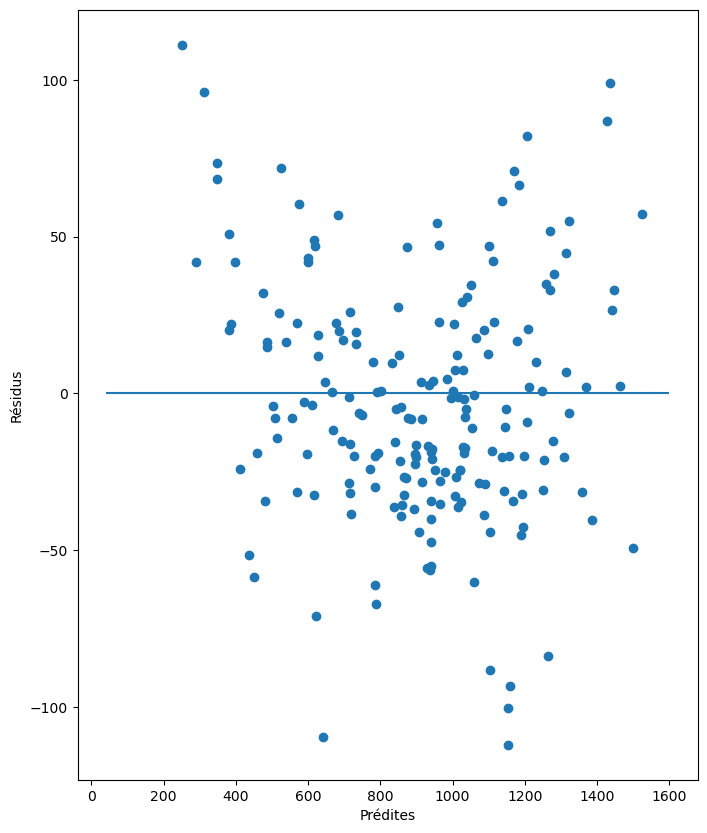

In [24]:
# Résidus sur l'échantillon de test
plt.plot(prev_ridge,Yr_test-prev_ridge,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,40,1600)
plt.show()

# On a exactement les mêmes résidus pour ridge et lasso je ne sais pas pourquoi

Text(0.5, 1.0, 'Coefficients du modèle Ridge')

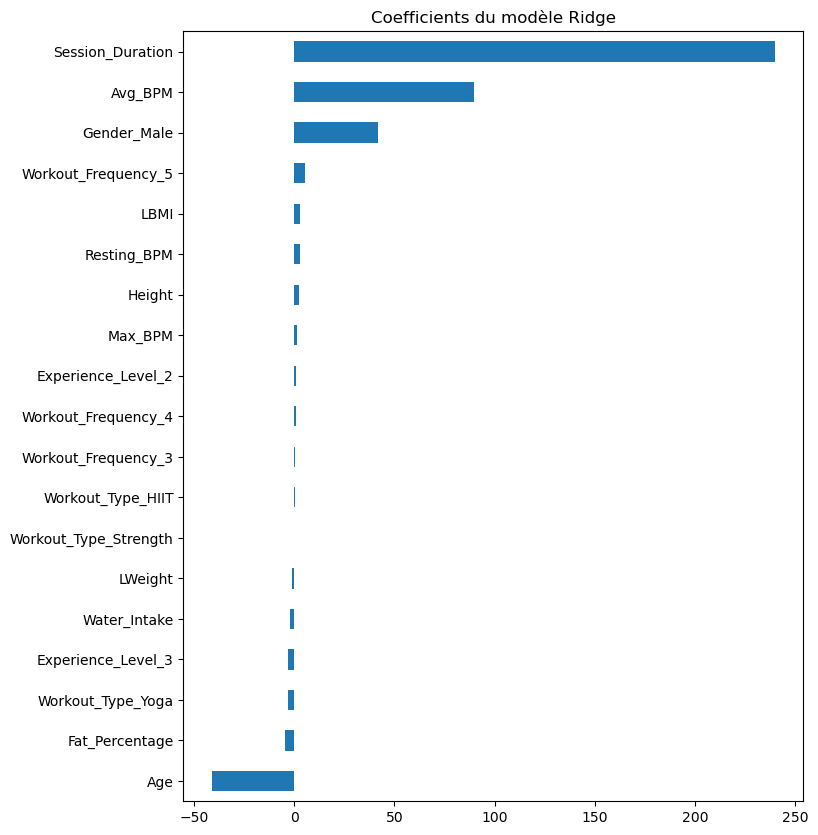

In [25]:
#Importance des paramètres

regRidge=linear_model.Ridge(alpha=regRidgeOpt.best_params_['alpha'])
model_ridge=regRidge.fit(Xr_train,Yr_train)
model_ridge.coef_
coef = pd.Series(model_ridge.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients du modèle Ridge")

## 2.3 Support Vector Regression(SVR)


### 2.3.1 Régression sur l'échantillon d'apprentissage

Nous nous interressons seulement au noyau gaussien. Nous estimons les paramètres optimaux par validation croisée.

In [26]:
from sklearn.svm import SVR

In [27]:
# Définition du modèle SVR et des hyperparamètres à tester
svr = SVR()
param_grid = {
    'C': [3.5,5, 8, 12, 20,50, 100, 120],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

# Grid Search avec validation croisée
grid_search = GridSearchCV(svr, param_grid, cv=10)
grid_search.fit(Xr_train, Yr_train)

# Meilleur modèle
best_svr = grid_search.best_estimator_
print("Meilleurs paramètres trouvés :", grid_search.best_params_)


Meilleurs paramètres trouvés : {'C': 120, 'gamma': 0.01}


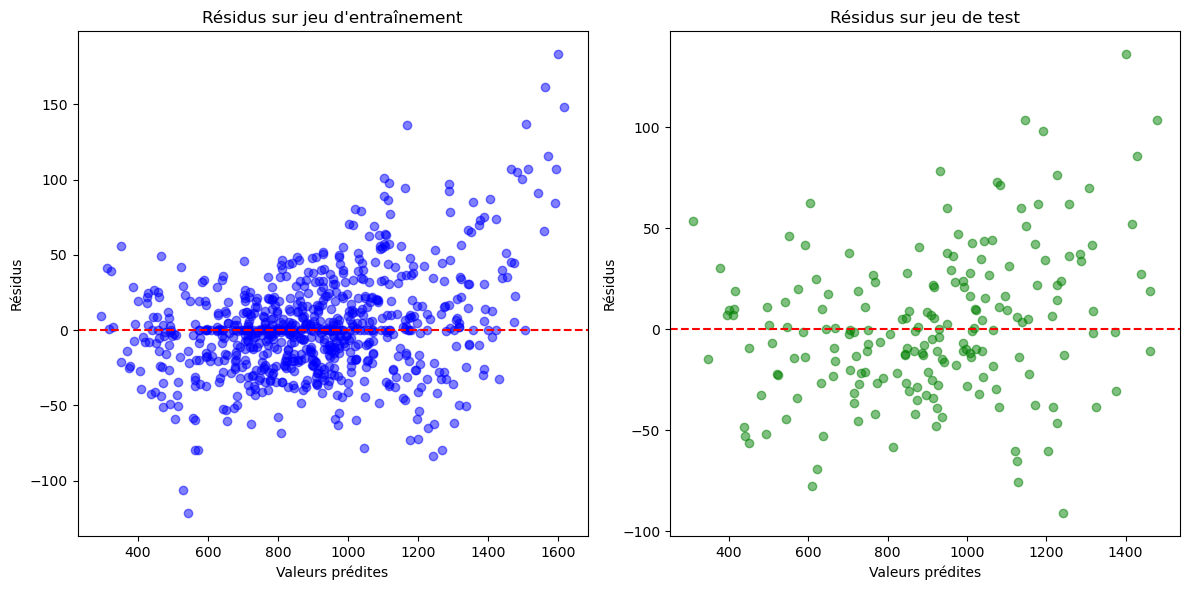

In [28]:
# Prédiction sur les jeux de données
Yr_train_pred = best_svr.predict(Xr_train)
Yr_test_pred = best_svr.predict(Xr_test)

# Calcul des résidus
residus_train = Yr_train - Yr_train_pred
residus_test = Yr_test - Yr_test_pred

# Tracé des résidus
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(Yr_train_pred, residus_train, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Résidus sur jeu d'entraînement")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")

plt.subplot(1, 2, 2)
plt.scatter(Yr_test_pred, residus_test, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Résidus sur jeu de test")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")

plt.tight_layout()
plt.show()

#### Prévision sur l'échantillon de test

In [29]:
# Résultats de prédiction sur l'échantillon de test

mse_svr=mean_squared_error(Yr_test_pred,Yr_test)
q2_svr=r2_score(Yr_test,Yr_test_pred)
print("MSE=", mse_svr)
print("Q2=",q2_svr)

MSE= 1321.5684050933357
Q2= 0.9827137717620367


## Arbre Optimal

In [30]:
# Optimisation de la profondeur de l'arbre dans le cas d'une régression
param=[{"max_depth":list(range(2,10))}]
tree= GridSearchCV(DecisionTreeRegressor(),param,cv=5,n_jobs=-1)
treeOpt=tree.fit(Xr_train, Yr_train)

# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % ( treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.922913, Meilleur paramètre = {'max_depth': 8}


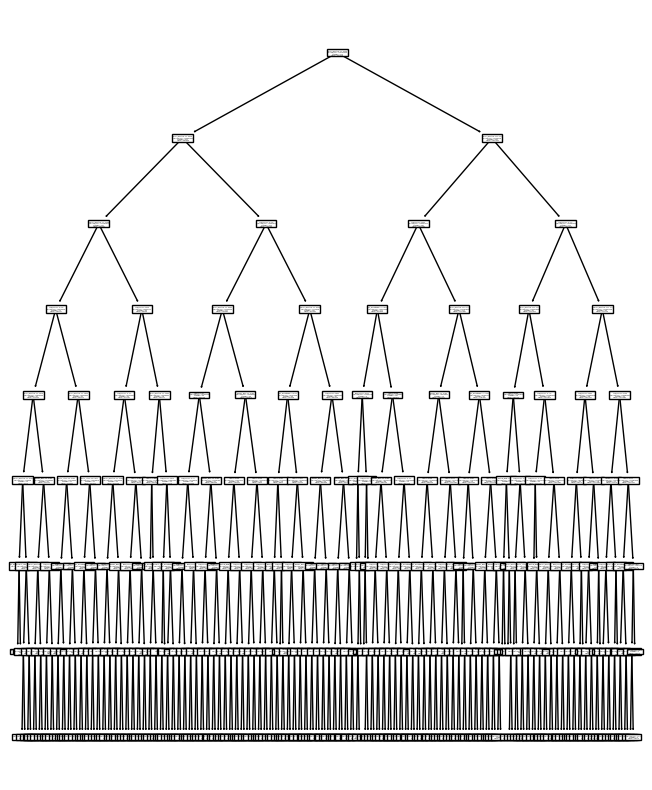

In [31]:
# Arbre optimisé
tree_opt = DecisionTreeRegressor(max_depth=treeOpt.best_params_['max_depth'])
tree_opt.fit(Xr_train, Yr_train)

#Affichage de l'arbre optimisé
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plot_tree(tree_opt,feature_names=dfC.columns.tolist());
plt.show()


#### Prédiction sur l'échantillon de test et graphe des résidus

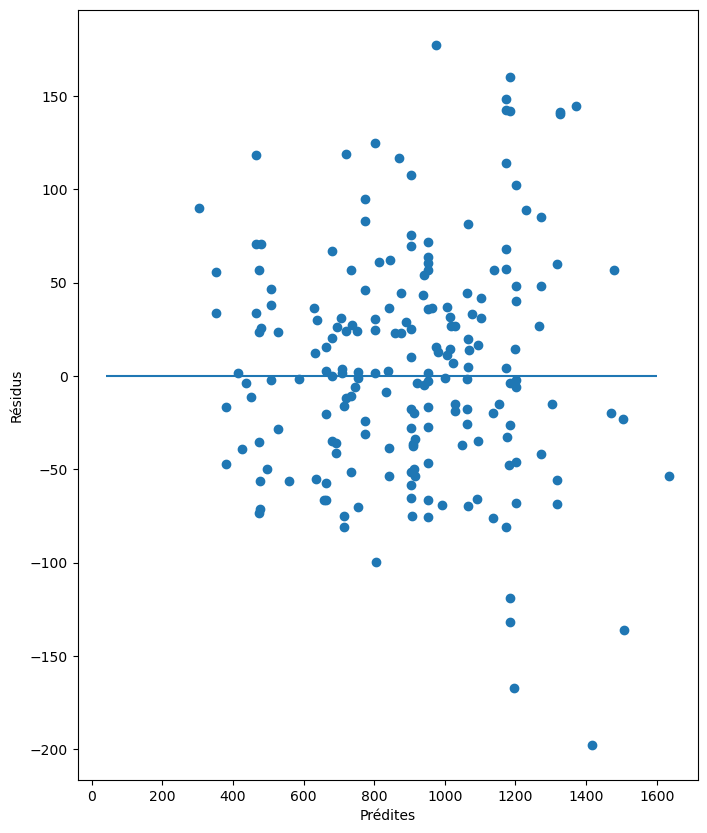

In [32]:
y_pred_test = tree_opt.predict(Xr_test)
res_cart = Yr_test - y_pred_test

# Résidus sur l'échantillon de test
plt.plot(y_pred_test,res_cart,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,40,1600)
plt.show()

###### MSE

In [34]:
mse_test_cart = mean_squared_error(Yr_test, y_pred_test)
print("MSE sur l'échantillon test :", mse_test_cart)
q2_cart=r2_score(Yr_test,y_pred_test)
print("Q2 :",q2_cart)

MSE sur l'échantillon test : 3782.8035073342744
Q2 : 0.9505206052481783


## Forêt Aléatoire

Cherchons le paramètre optimal par validation croisée.

In [35]:
param=[{"max_features":list(range(2,10,1))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xr_train, Yr_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % ( rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.960993, Meilleur paramètre = {'max_features': 9}


##### Prévision sur l'échantillon de test

In [36]:
# prévision
y_pred_test_rf = rfOpt.predict(Xr_test)


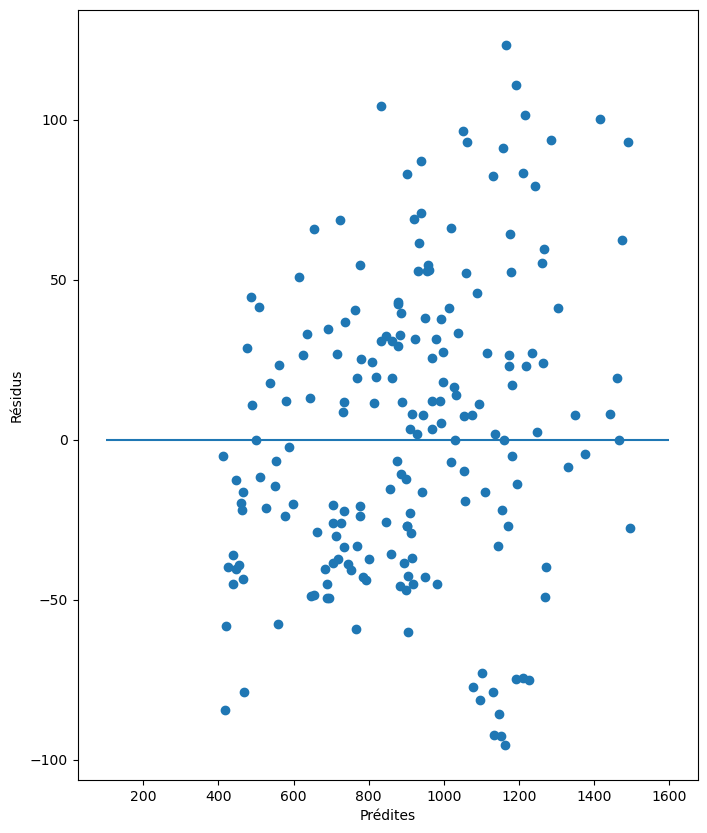

In [37]:
res_rf = Yr_test - y_pred_test_rf

# Résidus sur l'échantillon de test
plt.plot(y_pred_test_rf,res_rf,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,100,1600)
plt.show()

In [38]:
mse_test_rf = mean_squared_error(Yr_test, y_pred_test_rf)
print("MSE sur l'échantillon test :", mse_test_rf)
q2_cart=r2_score(Yr_test,y_pred_test_rf)
print("Q2 :",q2_cart)

MSE sur l'échantillon test : 2155.5241507692303
Q2 : 0.9718055589865532


##### Importance des variables

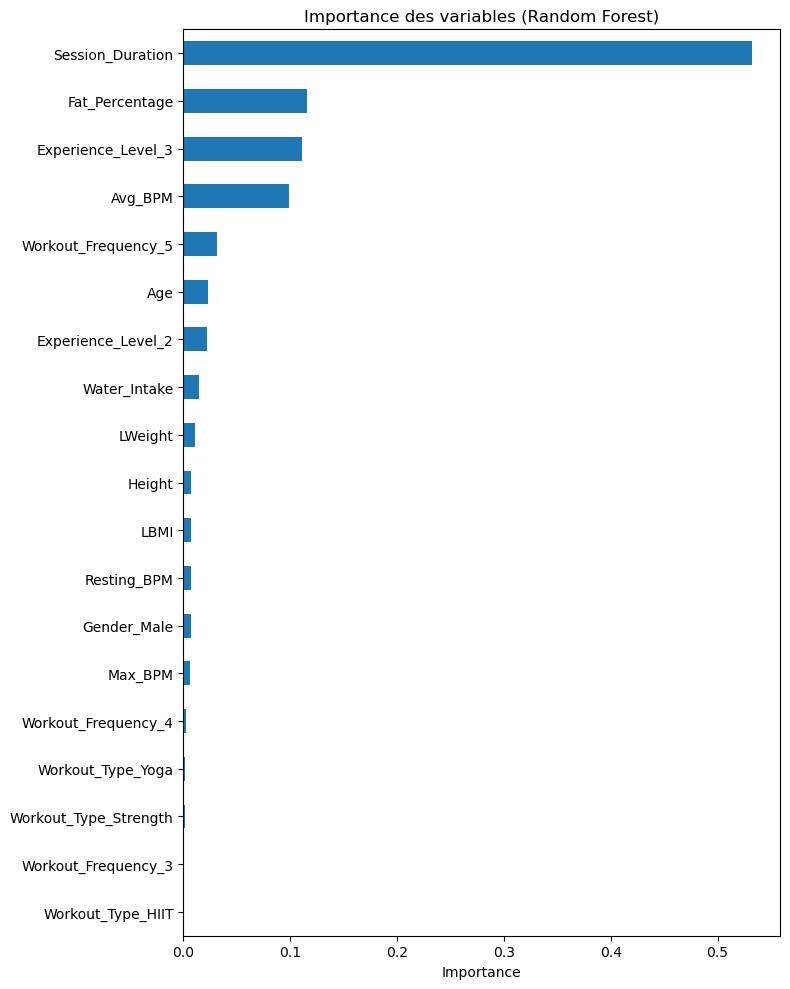

In [39]:
importances = rfOpt.best_estimator_.feature_importances_
coef_rf = pd.Series(importances, index=X_train.columns)

# Tri des importances
imp_coef_rf = coef_rf.sort_values()

# Affichage
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef_rf.plot(kind="barh")
plt.title("Importance des variables (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

## 2.6 Boosting

### 2.6.1 Régression

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

# on initialise une classe GradientBoostingRegressor sans préciser le nombre d'arbres

boost_reg = GradientBoostingRegressor(
    learning_rate=0.03,      
    min_samples_leaf=5,      
    max_depth=3,             
    loss='squared_error',    
    verbose=0
)

In [53]:
# On fait une validation croisée pour voir le nombre d'arbres optimal. J'ai recopié
# ce qu'il y a sur R mais ça ne me semble pas très logique puisque c'est evident que 
# plus il y a d'arbres moins l'erreur sera grande donc cette étape était un peu 
# prévisible. On se serait arrêté à 1000, la validation croisée nous aurait dit de prendre 1000.


param_grid = {
    'n_estimators': list(range(100, 801, 100)) 
}

# Validation croisée avec GridSearchCV
grid = GridSearchCV(boost_reg, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(Xr_train, Yr_train)

# Meilleur nombre d’arbres
best_iter = grid.best_params_['n_estimators']
print("Meilleur nombre d'arbres (best.iter) :", best_iter)

Meilleur nombre d'arbres (best.iter) : 800


In [54]:
boost_reg = GradientBoostingRegressor(
    n_estimators=800,
    learning_rate=0.03,      
    min_samples_leaf=5,      
    max_depth=3,             
    loss='squared_error',    
    verbose=0
)

##### Calcul des résidus

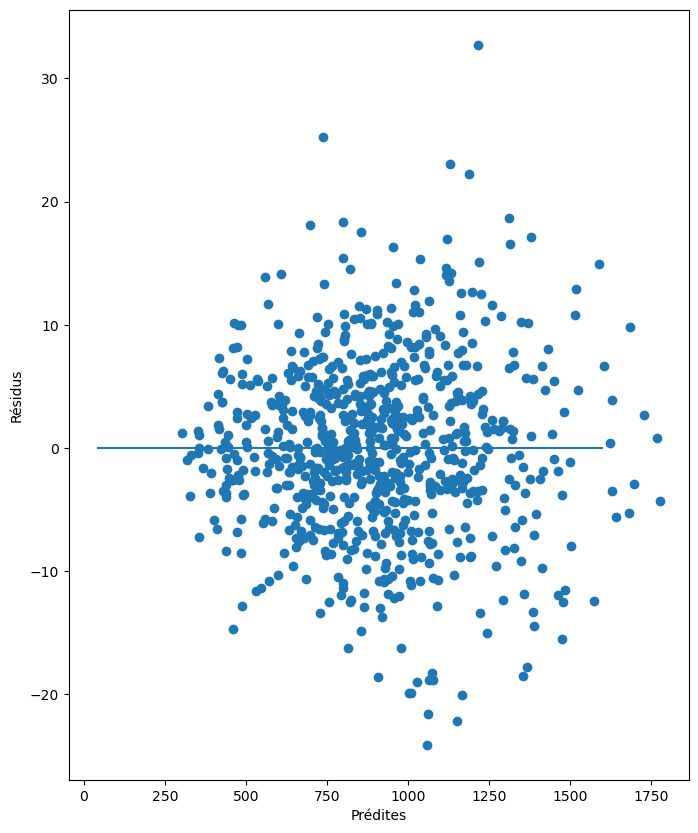

In [43]:
boost_reg.fit(Xr_train, Yr_train)
fit_boostr = boost_reg.predict(Xr_train)
res_boostr = fit_boostr - Yr_train

plt.plot(fit_boostr,res_boostr,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,40,1600)
plt.show()

### 2.6.2 Prévision de l'échantillon test, erreur de régression

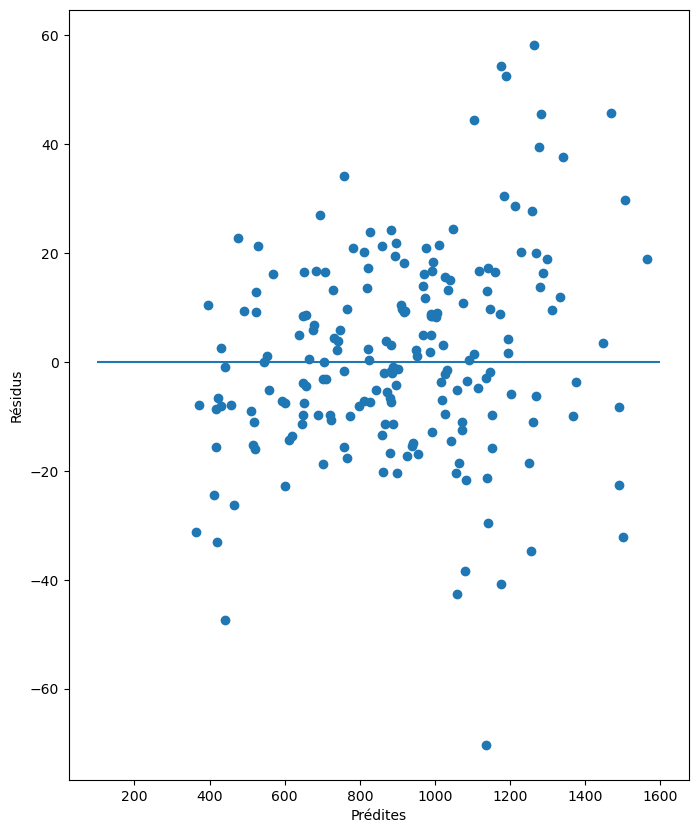

In [44]:
y_pred_test_gb = boost_reg.predict(Xr_test)
res_gb = Yr_test - y_pred_test_gb

# Résidus sur l'échantillon de test
plt.plot(y_pred_test_gb,res_gb,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,100,1600)
plt.show()

In [45]:
mse_test_gb = mean_squared_error(Yr_test, y_pred_test_gb)
print("MSE sur l'échantillon test :", mse_test_gb)
q2_cart=r2_score(Yr_test,y_pred_test_gb)
print("Q2 :",q2_cart)

MSE sur l'échantillon test : 349.3315568656878
Q2 : 0.995430713234797


Le boosting a de bonnes performances. L'erreur de prévision est similaire à celle des modèles linéaires. Toutefois, son temps de calcul est plus long et son interprétabilité plus faible.

## 2.7 Réseau de neurones

### 2.7.1 Régression

In [46]:
from sklearn.neural_network import MLPRegressor
import warnings
from sklearn.exceptions import ConvergenceWarning

nnet_reg = MLPRegressor(   
    max_iter=10000,           
)   

param_grid = {
    'hidden_layer_sizes': [(5,),(6,),(7,),(8,)],
    'alpha': [1, 2, 3]
}

grid = GridSearchCV(nnet_reg, param_grid, cv=5, n_jobs=-1)
grid.fit(Xr_train, Yr_train)

/usr/local/insa/anaconda/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anac

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=10000), n_jobs=-1,
             param_grid={'alpha': [1, 2, 3],
                         'hidden_layer_sizes': [(5,), (6,), (7,), (8,)]})

Size définit le nombre de neurones dans la couche cachée. Plus size est grand, plus le réseau a de capacité à apprendre des relations complexes (modèle plus puissant). Decay est le coefficient de régularisation L2 (penalisation des poids). Nous cherchons les paramètres optimaux grâce à la fonction Tune.nnet.

In [47]:
best_model = grid.best_estimator_
best_params = grid.best_params_

print("Meilleurs paramètres : %s" % (best_params))
print("Score R^2 sur training :", best_model.score(Xr_train, Yr_train))

Meilleurs paramètres : {'alpha': 2, 'hidden_layer_sizes': (7,)}
Score R^2 sur training : 0.9859299937888114


On a un R2 négatif!! c'est très mauvais comme résultat

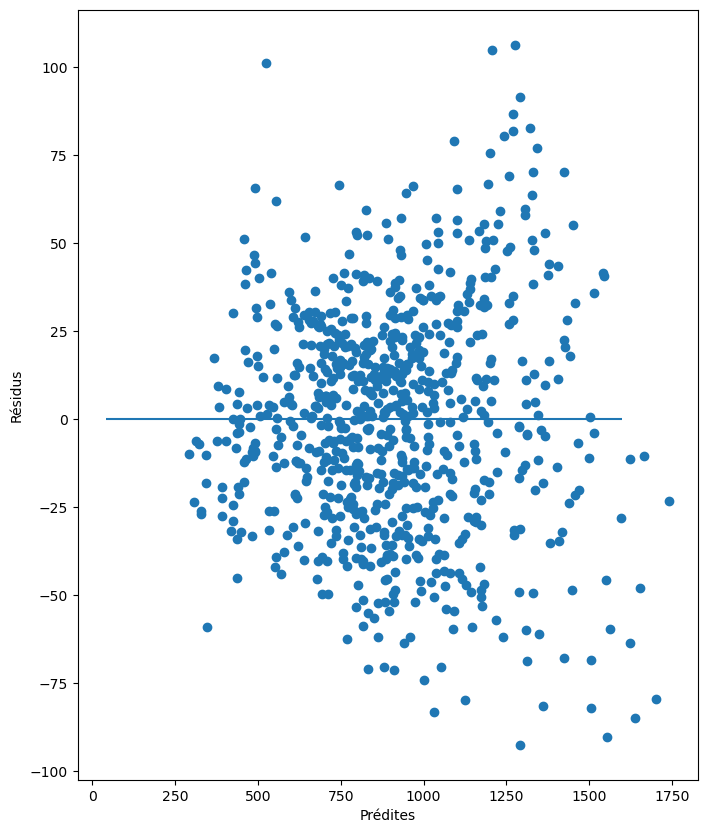

In [48]:
fit_nnetr = best_model.predict(Xr_train)
res_nnetr = fit_nnetr - Yr_train

plt.plot(fit_nnetr,res_nnetr,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,40,1600)
plt.show()

### 2.7.2 Prévision de l'échantillon test, erreur de régression

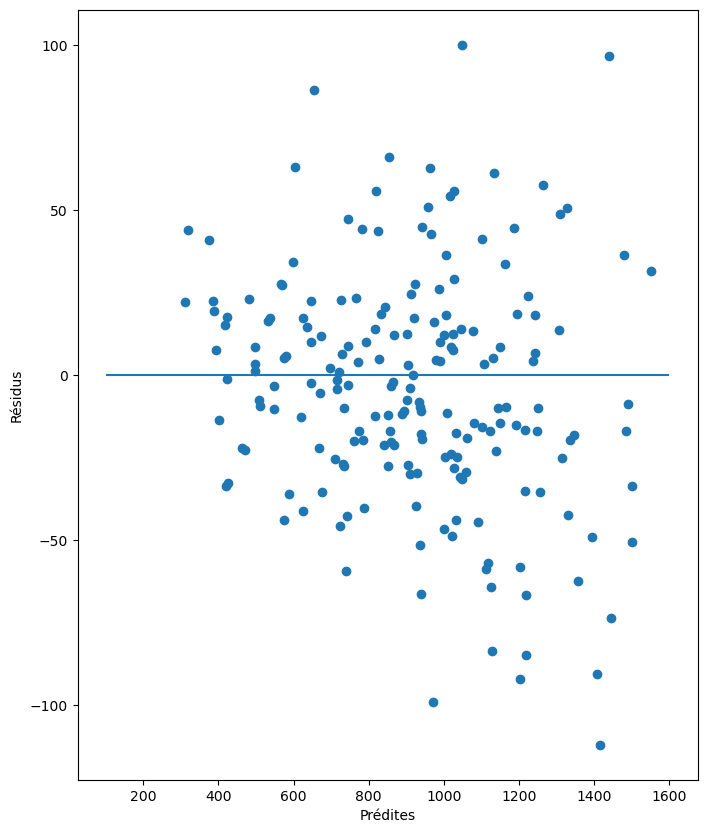

In [49]:
y_pred_test_rn = best_model.predict(Xr_test)
res_rn = Yr_test - y_pred_test_rn

# Résidus sur l'échantillon de test
plt.plot(y_pred_test_rn,res_rn,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,100,1600)
plt.show()

In [50]:
mse_test_rn = mean_squared_error(Yr_test, y_pred_test_rn)
print("MSE sur l'échantillon test :", mse_test_rn)
q2_cart=r2_score(Yr_test,y_pred_test_rn)
print("Q2 :",q2_cart)

MSE sur l'échantillon test : 1278.3893747478985
Q2 : 0.9832785571872696


La MSE du réseaux de neurones est similaire à celle des modèles linéaires (environ 1500). Il est important de noter que le tuning des paramètres pour le réseau de neurones est assez long et très couteux. De plus, nous observons une certaine variabilité des résultats due à l'initialisation àléatoire. Ici d'autres paramètres sont peut-être plus optimaux mais le coût de calcul pour leur recherche est conséquent et les résultats sont variables. 

## 2.8 Comparaison finale des différents modèles

Finalement, voici les résultats des différents modèles sur l'échantillon test. Pour des raisons d'explicabilité et d'interprétation des résultats nous affichons la RMSE et non la MSE car la RMSE est dans la même unité que "Calories_Burned", soit en calories.

In [51]:
print("RMSE RdN :",np.sqrt(mse_test_rn),"\n")
print("RMSE Boosting :",np.sqrt(mse_test_gb),"\n")
print("RMSE Foret aléatoire :" ,np.sqrt(mse_test_rf),"\n")
print("RMSE Arbre optimal :",np.sqrt(mse_test_cart) ,"\n")
print("RMSE pour un SVR avec noyau radial :",np.sqrt(mse_svr) , "\n")
print("RMSE Modèle linéaire Ridge :", np.sqrt(mse_mod_lin_ridge), "\n")
print("RMSE Modèle linéaire Lasso :", np.sqrt(mse_mod_lin_lasso), "\n")

#print("RMSE modèle linéaire sans sélection de variable :", np.sqrt(mse.lm), "\n")

RMSE RdN : 35.75457138252252 

RMSE Boosting : 18.690413501730983 

RMSE Foret aléatoire : 46.42762271287676 

RMSE Arbre optimal : 61.504499895001786 

RMSE pour un SVR avec noyau radial : 36.353382306098226 

RMSE Modèle linéaire Ridge : 38.585353372950436 

RMSE Modèle linéaire Lasso : 38.009333438476816 



##### Quels sont les modèles les plus performants ? Quel est le niveau de précision obtenu ? Quels modèles retenir si l’on ajoute une contrainte d’interprétabilité ?

SVR avec un noyau radial est le modèle le plus performant avec une RMSE égale à 30. Ainsi, lors de la prédiction du nombre Il est suivi par le modèle par boosting avec une RMSE égale à 39.

Or, SVR, Boosting, Réseaux de neurones ont un niveau d'interprétabilité très faible.

Donc si on rajoute une contrainte d'interprétabilité, les modèles linéaires sont les plus pertinents. Le modèle avec sélection de variables LASSO avec lambda.min semble être le meilleur compromis avec une MSE égale à 2007.

##### Retour sur l'analyse de données

vos résultats sont-ils cohérents avec l’analyse exploratoire des données, par exemple en ce qui concerne l’importance des variables ?

Les résultats obtenus sont cohérents avec l'analyse exploratoire des données. En effet, les modèles linéaires avec sélection de variable et l'arbre optimal ont confirmé nos analyses sur la grande importance de la variable "Durée de la session". Nous avons également retrouvé l'importance du genre dans la sélection des variables des modèles linéaires. Toutefois, nous n'avions pas trouvé grande importance à la variable "Avg_BPM" dans notre analyse exploratoire alors que les modèles de prédiction ont mis en avant cette variable.

<h1 style="color:red">III- Prédiction du niveau d'expérience</h1>


In [ ]:
from sklearn.metrics import auc  # Ajout nécessaire

def compute_roc_points(y_true_bin, y_scores):
    """
    Calcule manuellement les points de la courbe ROC pour une classe.
    """
    thresholds = np.sort(np.unique(y_scores))[::-1]
    tpr_list = []
    fpr_list = []

    P = sum(y_true_bin)
    N = len(y_true_bin) - P

    for thresh in thresholds:
        preds = (y_scores >= thresh).astype(int)
        TP = np.sum((preds == 1) & (y_true_bin == 1))
        FP = np.sum((preds == 1) & (y_true_bin == 0))
        TPR = TP / P if P != 0 else 0
        FPR = FP / N if N != 0 else 0
        tpr_list.append(TPR)
        fpr_list.append(FPR)

    return np.array(fpr_list), np.array(tpr_list)

def plot_multiclass_roc_manual(y_true, y_proba, class_names=None, title="Courbes ROC Multiclasse (manuel)"):
    """
    Affiche les courbes ROC multiclasse avec AUC dans la légende.
    """
    classes = np.unique(y_true)
    n_classes = len(classes)

    if class_names is None:
        class_names = [str(c) for c in classes]

    plt.figure(figsize=(8, 6))
    colors = plt.cm.get_cmap('tab10', n_classes)

    for idx, cls in enumerate(classes):
        y_true_bin = (y_true == cls).astype(int)
        y_scores = y_proba[:, idx]

        fpr, tpr = compute_roc_points(y_true_bin, y_scores)
        auc_value = auc(fpr, tpr)  # Calcul AUC ici

        plt.plot(fpr, tpr, label=f"Classe {class_names[idx]} (AUC = {auc_value:.2f})", color=colors(idx), lw=2)

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.xlabel("Faux positifs (1 - Spécificité)")
    plt.ylabel("Vrais positifs (Sensibilité)")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
GymDum=pd.get_dummies(gym[["Gender","Workout_Type","Experience_Level","Workout_Frequency"]])
GymDum = GymDum.drop(columns=["Workout_Type_Cardio","Workout_Frequency_2"])


GymDum2=pd.get_dummies(gym[["Gender","Workout_Type","Workout_Frequency"]])
GymDum2 = GymDum2.drop(columns=["Workout_Type_Cardio","Workout_Frequency_2"])


Y1=GymDum["Experience_Level_1"]
Y2=GymDum["Experience_Level_2"]
Y3=GymDum["Experience_Level_3"]

Yb=gym["Experience_Level"]

Y1.head()

In [ ]:
dfC2=pd.concat([GymDum,gymQuant],axis=1)
dfC2=dfC2.drop(columns=["Experience_Level_1","Experience_Level_2", "Experience_Level_3"]) 

dfC3=pd.concat([GymDum2,gymQuant],axis=1)

dfC2.head()

### Séparation des échantillons en train et test

In [ ]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(dfC2,Y1,test_size=0.2,random_state=17)
X2_train,X2_test,Y2_train,Y2_test=train_test_split(dfC2,Y2,test_size=0.2,random_state=17)
X3_train,X3_test,Y3_train,Y3_test=train_test_split(dfC2,Y3,test_size=0.2,random_state=17)
X_train,X_test,Yb_train,Yb_test=train_test_split(dfC3,Yb,test_size=0.2,random_state=17)

Normalisons ensuite les données, ce qui est nécessaire pour certains modèles.

In [ ]:
scaler = StandardScaler()  
scaler.fit(X1_train)  
scaler.fit(X2_train)  
scaler.fit(X3_train)  
scaler.fit(X_train)  

Xb1_train = scaler.fit_transform(X1_train)  
Xb1_test = scaler.transform(X1_test)
Xb2_train = scaler.fit_transform(X2_train)  
Xb2_test = scaler.transform(X2_test)
Xb3_train = scaler.fit_transform(X3_train)  
Xb3_test = scaler.transform(X3_test)
Xb_train = scaler.fit_transform(X_train)  
Xb_test = scaler.transform(X_test)

## Modèle linéaire

### Regression logistique binaire 

La regression logistique s'applique normalement à de la classification binaire donc on doit séparer en trois prédictions.

faire la reg logistique comme en R et afficher l'importance des variables. attention à bien faire de la validation croisée.

In [ ]:
import statsmodels.api as sm
#On ajoute une constante (intercept)
Xb1_train_const = sm.add_constant(Xb1_train)
Xb1_test_const = sm.add_constant(Xb1_test)

# Régression logistique binaire pour la classe 1
model_logit_0 = sm.Logit(Y1_train, Xb1_train_const)
result_0 = model_logit_0.fit()

# Résumé du modèle
print(result_0.summary())

# Prédictions (probas) sur l'ensemble test
pred_proba_0 = result_0.predict(Xb1_test_const)

# Matrice de confusion avec seuil 0.5
pred_class_0 = (pred_proba_0 > 0.5).astype(int)
conf_matrix_0 = pd.crosstab(pred_class_0, Y1_test, rownames=["Prédit"], colnames=["Réel"])
print("\nMatrice de confusion pour classe 1 :\n", conf_matrix_0)

La classe 3 ne marche pas car il n'y a pas assez de données.On va faire Une regression logistique muliclasse.

In [ ]:
# Pour la classe 2
Xb2_train_const = sm.add_constant(Xb2_train)
Xb2_test_const = sm.add_constant(Xb2_test)

model_logit_1 = sm.Logit(Y2_train, Xb2_train_const)
result_1 = model_logit_1.fit()
print(result_1.summary())

pred_proba_1 = result_1.predict(Xb2_test_const)
pred_class_1 = (pred_proba_1 > 0.5).astype(int)
conf_matrix_1 = pd.crosstab(pred_class_1, Y2_test, rownames=["Prédit"], colnames=["Réel"])
print("\nMatrice de confusion pour classe  2 :\n", conf_matrix_1)

# Pour la classe 3
Xb3_train_const = sm.add_constant(Xb3_train)
Xb3_test_const = sm.add_constant(Xb3_test)

model_logit_2 = sm.Logit(Y3_train, Xb3_train_const)
result_2 = model_logit_2.fit()
print(result_2.summary())

pred_proba_2 = result_2.predict(Xb3_test_const)
pred_class_2 = (pred_proba_2 > 0.5).astype(int)
conf_matrix_2 = pd.crosstab(pred_class_2, Y3_test, rownames=["Prédit"], colnames=["Réel"])
print("\nMatrice de confusion pour classe 3 :\n", conf_matrix_2)


## Regression logistique multiclasse :

## SVM

In [ ]:
from sklearn.svm import SVC

SVC nous permet de faire de la prédiction multiclasse :

In [ ]:

param=[{"C":[0.4,0.5,0.6,0.8,1,1.4,2,2.5]}]
svm= GridSearchCV(SVC(probability=True),param,cv=10,n_jobs=-1)
svmOpt=svm.fit(Xb_train, Yb_train)

# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - svmOpt.best_score_,svmOpt.best_params_))

#### Erreur sur l'échantillon de test

In [ ]:
# prévision de l'échantillon test
y_pred_test_svm = svmOpt.predict(Xb_test)
y_proba_test_svm = svmOpt.predict_proba(Xb_test)
# matrice de confusion
table=pd.crosstab(y_pred_test_svm ,Yb_test)
print("Matrice de confusion: ")
print(table)

print("")
print("")

print("Rapport de classification: ")
print(classification_report(Yb_test, y_pred_test_svm))

accuracy_svm=accuracy_score(Yb_test, y_pred_test_svm)
erreur_precision_svm= 1- accuracy_svm
print(erreur_precision_svm)

In [ ]:
plot_multiclass_roc_manual(Yb_test,y_proba_test_svm, class_names=None)

## Arbre optimal

In [ ]:
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,12))}]
tree= GridSearchCV(DecisionTreeClassifier(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xb_train, Yb_train)

# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))


In [ ]:
best_tree=DecisionTreeClassifier(max_depth=treeOpt.best_params_['max_depth'])
best_tree.fit(Xb_train,Yb_train)
plot_tree(best_tree,feature_names=dfC.columns.tolist());
plt.show()

### Erreur de prevision sur l'échantillon de test : 

In [ ]:
# prévision de l'échantillon test
y_pred_test_CART = treeOpt.predict(Xb_test)
y_proba_test_CART = treeOpt.predict_proba(Xb_test)

# matrice de confusion
print("Matrice de confusion CART : ")
table=pd.crosstab(y_pred_test_CART,Yb_test)
print((pd.DataFrame(table)))

print("")
print("")

print("Rapport de classification CART : ")
print(classification_report(Yb_test, y_pred_test_CART))

accuracy_CART=accuracy_score(Yb_test, y_pred_test_CART)
erreur_precision_CART= 1- accuracy_CART
print(erreur_precision_CART)

In [ ]:
plot_multiclass_roc_manual(Yb_test,y_proba_test_CART, class_names=None)

## Forêt Aléatoire

In [ ]:
param=[{"max_features":list(range(2,10,1))}]
rf= GridSearchCV(RandomForestClassifier(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xb_train, Yb_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

#### Erreur de prévision sur le test

In [ ]:
# prévision
y_pred_rf = rfOpt.predict(Xb_test)
y_proba_rf = rfOpt.predict_proba(Xb_test)
# matrice de confusion
print("Matrice de confusion: ")
table=pd.crosstab(y_pred_rf,Yb_test)
print(table)

print("")
print("")

print("Rapport de classification: ")
print(classification_report(Yb_test, y_pred_rf))

accuracy_rf=accuracy_score(Yb_test, y_pred_rf)
erreur_precision_rf= 1- accuracy_rf
print(erreur_precision_rf)

In [ ]:
plot_multiclass_roc_manual(Yb_test,y_proba_rf, class_names=None)

## Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
# Boosting multiclasse
boost_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1,
                                         max_depth=4, random_state=17)
boost_model.fit(Xb_train, Yb_train)

# Prédictions
y_pred_boost = boost_model.predict(Xb_test)
y_proba_boost = boost_model.predict_proba(Xb_test)

# Matrice de confusion
print("Matrice de confusion :")
print(pd.crosstab(Yb_test, y_pred_boost))


# Rapport de classification
print("\nRapport de classification :")
print(classification_report(Yb_test, y_pred_boost))
accuracy_boost=accuracy_score(Yb_test, y_pred_boost)
erreur_precision_boost= 1- accuracy_boost
print(erreur_precision_boost)

Remarque : C'est la même erreur que pour randomforest, pourtant c'est pas exactement le même rapport de classification.

In [ ]:
plot_multiclass_roc_manual(Yb_test, y_proba_boost, class_names=None)

## RDN

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
mlp_clf = MLPClassifier(max_iter=10000, random_state=17)

param_grid = {
    'hidden_layer_sizes': [(5,), (10,), (15,), (20,)],
    'alpha': [0, 1, 2]
}

grid_clf = GridSearchCV(mlp_clf, param_grid, cv=5, n_jobs=-1)
grid_clf.fit(Xb_train, Yb_train)

best_model_clf = grid_clf.best_estimator_
best_params_clf = grid_clf.best_params_

In [ ]:
y_pred_test_nn = best_model_clf.predict(Xb_test)
y_prob_test_nn = best_model_clf.predict_proba(Xb_test)
accuracy_nn = accuracy_score(Yb_test, y_pred_test_nn)
print("Meilleurs paramètres :", best_params_clf)
print("Accuracy sur test :", accuracy_nn)
print("Classification report :\n", classification_report(Yb_test, y_pred_test_nn))
erreur_precision_nn=1-accuracy_nn
print(erreur_precision_nn)

In [ ]:
plot_multiclass_roc_manual(Yb_test,y_prob_test_nn, class_names=None)

## Comparaison des differents modèles : 

## Leur erreur de precision : 

In [ ]:
print("erreur de precision RdN :",erreur_precision_nn,"\n")
print("erreur de precision Boosting :",erreur_precision_boost,"\n")
print("erreur de precision Foret aléatoire :" ,erreur_precision_rf,"\n")
print("erreur de precision Arbre optimal CART :",erreur_precision_CART,"\n")
print("erreur de precision SVC :",erreur_precision_svm , "\n")
#print("erreur de precision Modèle linéaire :", np.sqrt(mse.lasso.min), "\n")

Faut faire marcher le modèle linéaire

MAsi dans tout les cas c'est l'arbre CART qui marche le mieux (Paul a eu la même concluion donc je valide mes resultats)